<a href="https://colab.research.google.com/github/shivaram-90062/2000090062/blob/main/NBA_National_Basketball_Association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




 * R sivaramakrishna
 Data set  : NBA - National basket ball Association


```



#importing packages required

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# Reading data set

In [ ]:
df = pd.read_csv('/content/2021-2022 NBA Player Stats - Regular.csv', encoding="Windows-1252", delimiter=";")
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [ ]:
df = df.drop(['Rk', 'Age', 'Tm'], axis=1)

In [ ]:

mapping = {'C': 'non-guard', 'PF': 'non-guard', 'SF': 'non-guard', 'SG': 'guard', 'PG': 'guard'}
df=df.replace({'Pos': mapping})
df.head()

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,non-guard,73,28,23.6,3.6,8.3,0.439,0.8,2.1,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,non-guard,76,75,26.3,2.8,5.1,0.547,0.0,0.0,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,non-guard,56,56,32.6,7.3,13.0,0.557,0.0,0.1,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,non-guard,32,0,11.3,1.7,4.1,0.402,0.2,1.5,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,non-guard,47,12,22.3,5.4,9.7,0.550,0.3,1.0,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [ ]:
print(df.shape)

(812, 27)


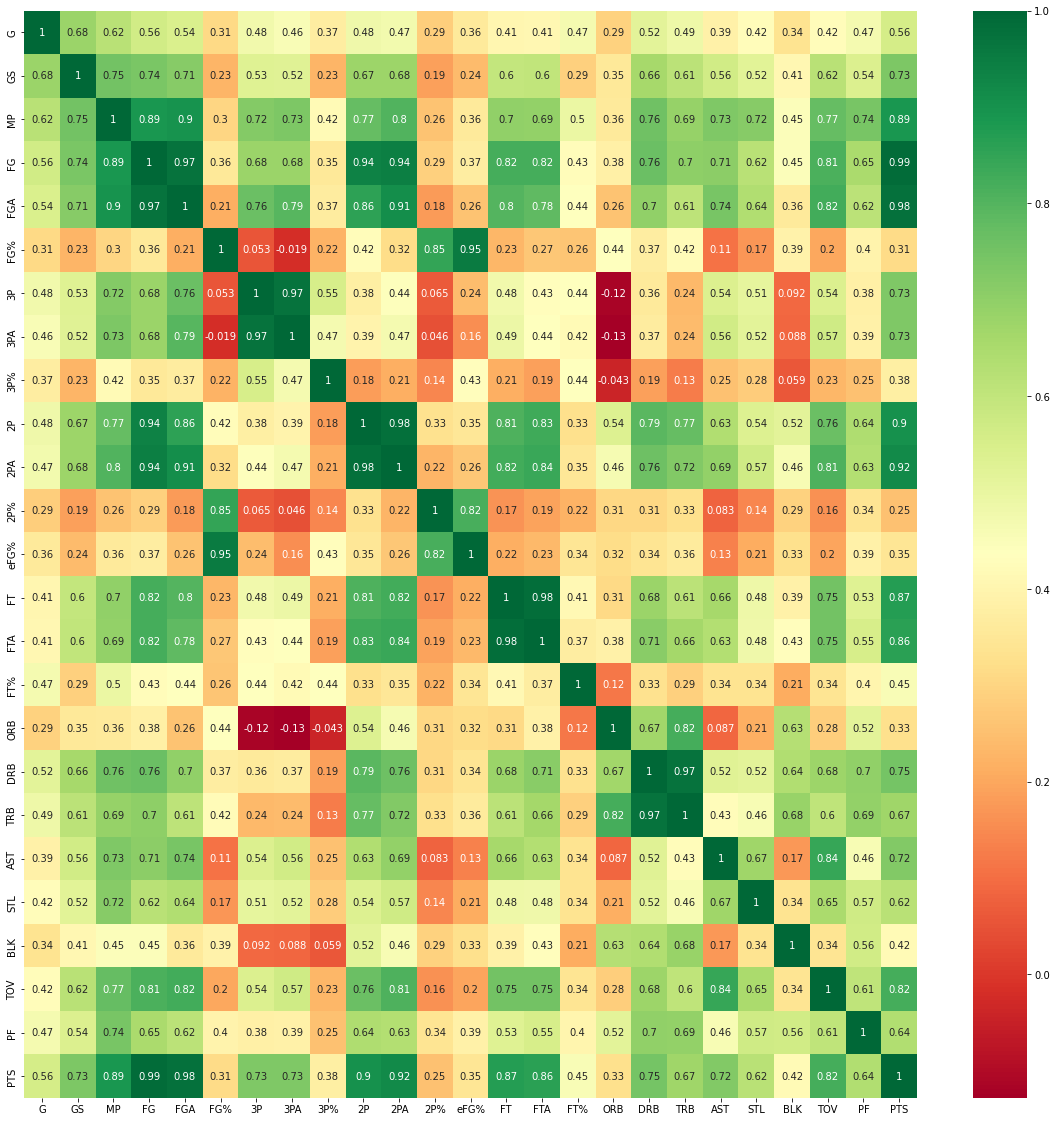

In [ ]:
X  = df.iloc[:, 1: 27]
y = df.iloc[:, 1]
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Data scaling:
columns = df.columns[2:]
columns

Index(['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [ ]:
df2 = df.drop(['Player', 'Pos'], axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df2.to_numpy())
print(df_scaled)

[[0.88888889 0.34146341 0.53176471 ... 0.25       0.42       0.29738562]
 [0.92592593 0.91463415 0.59529412 ... 0.3125     0.4        0.2254902 ]
 [0.67901235 0.68292683 0.74352941 ... 0.54166667 0.62       0.62418301]
 ...
 [0.67901235 0.14634146 0.27294118 ... 0.14583333 0.3        0.17320261]
 [0.32098765 0.         0.28470588 ... 0.14583333 0.42       0.16993464]
 [0.92592593 0.92682927 0.55058824 ... 0.3125     0.54       0.33660131]]


In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns = columns)
df_scaled = pd.concat((df_scaled, df['Pos']), axis=1)

In [ ]:
df_scaled.iloc[::100]

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos
0,0.888889,0.341463,0.531765,0.315789,0.380734,0.439,0.177778,0.179487,0.359,0.305263,...,0.434783,0.409091,0.442177,0.101852,0.20,0.214286,0.250000,0.42,0.297386,non-guard
100,0.320988,0.109756,0.360000,0.254386,0.252294,0.520,0.088889,0.136752,0.286,0.252632,...,0.217391,0.272727,0.272109,0.083333,0.08,0.285714,0.145833,0.32,0.241830,non-guard
200,0.876543,0.878049,0.783529,0.666667,0.793578,0.441,0.666667,0.717949,0.357,0.484211,...,0.195652,0.354545,0.326531,0.351852,0.60,0.214286,0.541667,0.46,0.696078,guard
300,0.851852,0.341463,0.447059,0.307018,0.261468,0.616,0.066667,0.068376,0.351,0.336842,...,0.347826,0.263636,0.306122,0.055556,0.20,0.285714,0.166667,0.44,0.303922,non-guard
400,0.037037,0.000000,0.277647,0.157895,0.174312,0.467,0.066667,0.085470,0.250,0.157895,...,0.065217,0.209091,0.170068,0.092593,0.20,0.000000,0.062500,0.40,0.222222,guard
500,0.197531,0.036585,0.261176,0.122807,0.165138,0.393,0.111111,0.136752,0.333,0.094737,...,0.173913,0.109091,0.129252,0.027778,0.04,0.071429,0.083333,0.30,0.114379,non-guard
600,0.876543,0.719512,0.640000,0.508772,0.555046,0.479,0.400000,0.401709,0.393,0.410526,...,0.543478,0.600000,0.619048,0.111111,0.28,0.250000,0.270833,0.48,0.477124,non-guard
700,0.481481,0.012195,0.414118,0.315789,0.357798,0.458,0.155556,0.188034,0.310,0.305263,...,0.065217,0.227273,0.190476,0.361111,0.24,0.035714,0.354167,0.44,0.303922,guard
800,0.049383,0.000000,0.065882,0.035088,0.027523,0.667,0.044444,0.034188,0.500,0.021053,...,0.000000,0.000000,0.000000,0.055556,0.00,0.000000,0.041667,0.04,0.032680,guard


In [ ]:
df = df_scaled.copy()
df.Pos.value_counts()

non-guard    440
guard        354
SG-SF          5
SF-SG          5
SG-PG          4
C-PF           2
PF-SF          1
PG-SG          1
Name: Pos, dtype: int64

In [ ]:
mapping2 = {'SG-PG': 'guard', 'C-PF': 'non-guard', 'PF-SF': 'non-guard', 'PG-SG': 'guard'}
df = df.replace({'Pos': mapping2})
df = df.loc[(df['Pos']!='SG-SF') & (df['Pos']!='SF-SG')]
print(df.shape)
df.Pos.value_counts()

(802, 26)


non-guard    443
guard        359
Name: Pos, dtype: int64

In [ ]:
# Now we are all set. We can continue to select the features we'll use.
X = df.iloc[:,0:25]
y = df.iloc[:,25]
X.head()

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.888889,0.341463,0.531765,0.315789,0.380734,0.439,0.177778,0.179487,0.359,0.305263,...,0.595,0.434783,0.409091,0.442177,0.101852,0.20,0.214286,0.250000,0.42,0.297386
1,0.925926,0.914634,0.595294,0.245614,0.233945,0.547,0.000000,0.000000,0.000,0.294737,...,0.543,1.000000,0.490909,0.680272,0.314815,0.36,0.285714,0.312500,0.40,0.225490
2,0.679012,0.682927,0.743529,0.640351,0.596330,0.557,0.000000,0.008547,0.000,0.768421,...,0.753,0.521739,0.690909,0.687075,0.314815,0.56,0.285714,0.541667,0.62,0.624183
3,0.382716,0.000000,0.242353,0.149123,0.188073,0.402,0.044444,0.128205,0.125,0.157895,...,0.625,0.217391,0.154545,0.183673,0.064815,0.08,0.107143,0.104167,0.22,0.133987
4,0.567901,0.146341,0.501176,0.473684,0.444954,0.550,0.066667,0.085470,0.304,0.536842,...,0.873,0.347826,0.354545,0.374150,0.083333,0.12,0.357143,0.187500,0.34,0.421569


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
select = SelectKBest(chi2, k=10)
z = select.fit(X, y)
X_select = pd.DataFrame({'Features': X.columns, 'Score': z.scores_})
X_select = X_select.sort_values(by='Score', ascending=False)
X_select = X_select.iloc[:10]
X_select

,Features,Score
16,ORB,25.256198
19,AST,14.902518
21,BLK,12.021205
18,TRB,10.642278
7,3PA,10.058571
6,3P,9.640373
17,DRB,6.152846
20,STL,2.427321
22,TOV,2.255186
5,FG%,1.661638


In [ ]:
feature_select = X_select.Features.to_list()
X = X[feature_select]
X.head()

,ORB,AST,BLK,TRB,3PA,3P,DRB,STL,TOV,FG%
0,0.434783,0.101852,0.214286,0.442177,0.179487,0.177778,0.409091,0.20,0.250000,0.439
1,1.000000,0.314815,0.285714,0.680272,0.000000,0.000000,0.490909,0.36,0.312500,0.547
2,0.521739,0.314815,0.285714,0.687075,0.008547,0.000000,0.690909,0.56,0.541667,0.557
3,0.217391,0.064815,0.107143,0.183673,0.128205,0.044444,0.154545,0.08,0.104167,0.402
4,0.347826,0.083333,0.357143,0.374150,0.085470,0.066667,0.354545,0.12,0.187500,0.550


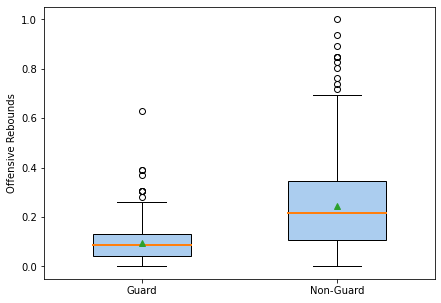

In [ ]:
# Are ORB (Offensive Rebounds), AST (Assists), and BLK (Blocks) really so important?
orb_g = df.loc[df.Pos=='guard']['ORB']
orb_ng = df.loc[df.Pos=='non-guard']['ORB']
plt.figure(figsize=(7,5))
boxes = plt.boxplot([orb_g, orb_ng], labels=['Guard', 'Non-Guard'], patch_artist=True, medianprops={'linewidth': 2}, showmeans=True, widths=0.5)
plt.ylabel('Offensive Rebounds')
for box in boxes['boxes']:
    box.set(facecolor = '#abcdef' )
plt.show()

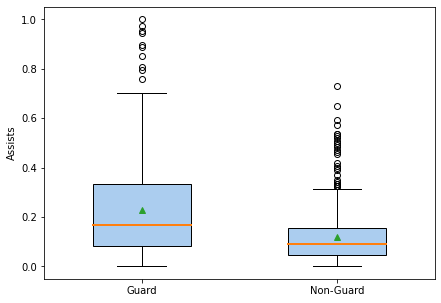

In [ ]:
ast_g = df.loc[df.Pos=='guard']['AST']
ast_ng = df.loc[df.Pos=='non-guard']['AST']
plt.figure(figsize=(7,5))
boxes = plt.boxplot([ast_g, ast_ng], labels=['Guard', 'Non-Guard'], patch_artist=True, medianprops={'linewidth': 2}, showmeans=True, widths=0.5)
plt.ylabel('Assists')
for box in boxes['boxes']:
    box.set(facecolor = '#abcdef' )
plt.show()

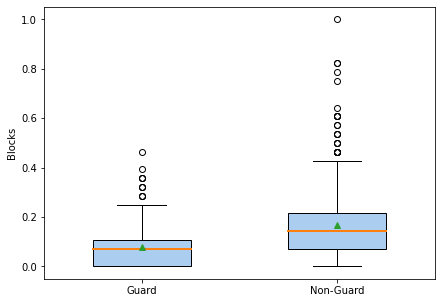

In [ ]:
blk_g = df.loc[df.Pos=='guard']['BLK']
blk_ng = df.loc[df.Pos=='non-guard']['BLK']
plt.figure(figsize=(7,5))
boxes = plt.boxplot([blk_g, blk_ng], labels=['Guard', 'Non-Guard'], patch_artist=True, medianprops={'linewidth': 2}, showmeans=True, widths=0.5)
plt.ylabel('Blocks')
for box in boxes['boxes']:
    box.set(facecolor = '#abcdef' )
plt.show()

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#model building

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression(C=1)
log_reg1.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
print(log_reg1.score(X_train, y_train))
print(log_reg1.score(X_test, y_test))

0.8449197860962567
0.8174273858921162


In [ ]:
# The score for training data is a little bit higher than testing data. So, to avoid overfitting, reduce C a little bit.
log_reg2 = LogisticRegression(C=0.5)
log_reg2.fit(X_train, y_train)
print(log_reg2.score(X_train, y_train))
print(log_reg2.score(X_test, y_test))

0.839572192513369
0.8174273858921162


In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
log_score1 = cross_val_score(log_reg1, X, y, cv=4)
log_score2 = cross_val_score(log_reg2, X, y, cv=4)
print(log_score1)
print(log_score2)

[0.82587065 0.79104478 0.86       0.86      ]
[0.81094527 0.78606965 0.865      0.85      ]


In [ ]:
# Let's stick to C=1.
# Linear SVM
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
svm_clf1 = Pipeline([("linear_svc", LinearSVC(C=1, loss="hinge"))])
svm_clf1.fit(X_train, y_train)

Pipeline(steps=[('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
Pipeline(steps=[('linear_svc', LinearSVC(C=1, loss='hinge'))])

Pipeline(steps=[('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
print(svm_clf1.score(X_train, y_train))
print(svm_clf1.score(X_test, y_test))

0.8360071301247772
0.8132780082987552


In [ ]:
# Looks pretty good! But it failed to converge.
svm_clf2 = Pipeline([("linear_svc", LinearSVC(C=0.5, loss="hinge"))])
svm_clf2.fit(X_train, y_train)
print(svm_clf2.score(X_train, y_train))
print(svm_clf2.score(X_test, y_test))

0.8342245989304813
0.8215767634854771


In [ ]:
svm_clf3 = Pipeline([("linear_svc", LinearSVC(C=0.1, loss="hinge"))])
svm_clf3.fit(X_train, y_train)
print(svm_clf3.score(X_train, y_train))
print(svm_clf3.score(X_test, y_test))

0.7843137254901961
0.7925311203319502


In [ ]:
# Let's stick to C=0.5
# Gaussian RBF Kernel
from sklearn.svm import SVC
rbf_clf1 = Pipeline([("svm_clf", SVC(kernel="rbf", gamma=5, C=1))])
rbf_clf1.fit(X_train, y_train)
print(rbf_clf1.score(X_train, y_train))
print(rbf_clf1.score(X_test, y_test))

0.8591800356506238
0.8132780082987552


In [ ]:
# Since our dataset is small, use Cross-Validation
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(rbf_clf1, X, y, cv=4, scoring='accuracy')
scores1


array([0.80099502, 0.7960199 , 0.83      , 0.855     ])

In [ ]:
# Looks nice! Try other values of gamma and C
rbf_clf2 = Pipeline([("svm_clf", SVC(kernel="rbf", gamma=10, C=0.5))])
rbf_clf2.fit(X_train, y_train)
print(rbf_clf2.score(X_train, y_train))
print(rbf_clf2.score(X_test, y_test))

0.8734402852049911
0.8008298755186722


In [ ]:
# Cross-Validation
scores2 = cross_val_score(rbf_clf2, X, y, cv=4, scoring='accuracy')
scores2

array([0.80597015, 0.78606965, 0.815     , 0.835     ])

In [ ]:
# Let's stick to gamma=5, C=1.
# Polynomial SVM
poly_clf1 = Pipeline([
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_clf1.fit(X_train, y_train)
print(poly_clf1.score(X_train, y_train))
print(poly_clf1.score(X_test, y_test))

0.8841354723707665
0.8049792531120332


In [ ]:
# Seems to be overfitting, let's make degree=2:
poly_clf2 = Pipeline([
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
])
poly_clf2.fit(X_train, y_train)
print(poly_clf2.score(X_train, y_train))
print(poly_clf2.score(X_test, y_test))

0.8680926916221033
0.8381742738589212


In [ ]:
# Cross-Validation:
poly_score1 = cross_val_score(poly_clf1, X, y, cv=4, scoring='accuracy')
poly_score2 = cross_val_score(poly_clf2, X, y, cv=4, scoring='accuracy')
print(poly_score1)
print(poly_score2)

[0.80099502 0.81094527 0.83       0.815     ]
[0.80597015 0.82587065 0.835      0.85      ]


In [ ]:
# The second model is better, let's keep degree=2, C=5 for polynomial SVM.
# Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf1 = BaggingClassifier(DecisionTreeClassifier(splitter='random', max_leaf_nodes=40), n_estimators=50, max_samples=1.0, bootstrap=True,n_jobs=-1)
bag_clf1.fit(X_train, y_train)
print(bag_clf1.score(X_train, y_train))
print(bag_clf1.score(X_test, y_test))

0.9340463458110517
0.8298755186721992


In [ ]:
# Seems to be overfitting. Let's reduce max_leaf_nodes.
bag_clf2 = BaggingClassifier(DecisionTreeClassifier(splitter='random', max_leaf_nodes=25), n_estimators=100, max_samples=1.0, bootstrap=True,n_jobs=-1)
bag_clf2.fit(X_train, y_train)
print(bag_clf2.score(X_train, y_train))
print(bag_clf2.score(X_test, y_test))

0.8983957219251337
0.8257261410788381


In [ ]:
xgb_score1 = cross_val_score(xgb_clf1, X, y, cv=4, scoring='accuracy')
xgb_score2 = cross_val_score(xgb_clf2, X, y, cv=4, scoring='accuracy')
print(xgb_score1)
print(xgb_score2)

[nan nan nan nan]
[nan nan nan nan]


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 4.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['guard' 'non-g

In [ ]:
# Let's keep learning_rate=1, n_estimators=30, max_depth=2 for our XGBoosting Classifier.
# ROC Curve:
from sklearn.preprocessing import label_binarize
ybin = label_binarize(y, classes=['non-guard', 'guard']).ravel()
ybin[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

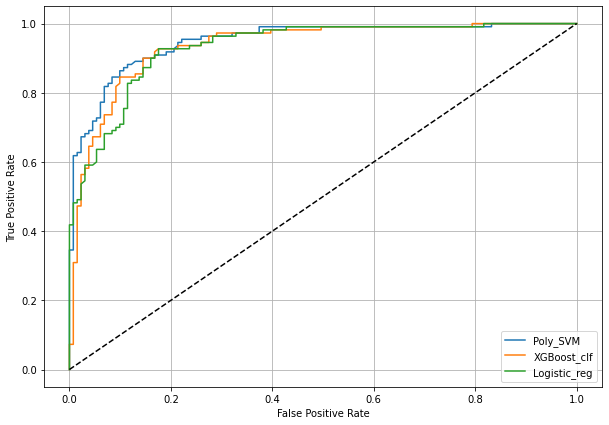

In [ ]:
from sklearn.metrics import roc_curve, auc
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(X, ybin, test_size=0.3)

poly_clf2.fit(Xbin_train, ybin_train)
ybin_test_pred = poly_clf2.decision_function(Xbin_test)
fpr1, tpr1, te_thresholds1 = roc_curve(ybin_test, ybin_test_pred)

xgb_clf2.fit(Xbin_train, ybin_train)
ybin_test_pred2 = xgb_clf2.predict_proba(Xbin_test)[:,1]
fpr2, tpr2, te_thresholds2 = roc_curve(ybin_test, ybin_test_pred2)

log_reg1.fit(Xbin_train, ybin_train)
ybin_test_pred3 = log_reg1.predict_proba(Xbin_test)[:,1]
fpr3, tpr3, te_thresholds3 = roc_curve(ybin_test, ybin_test_pred3)

plt.figure(figsize=(10,7))
plt.grid()
plt.plot(fpr1, tpr1, label='Poly_SVM')
plt.plot(fpr2, tpr2, label='XGBoost_clf')
plt.plot(fpr3, tpr3, label='Logistic_reg')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(ybin_test, ybin_test_pred))
print(roc_auc_score(ybin_test, ybin_test_pred2))
print(roc_auc_score(ybin_test, ybin_test_pred3))

0.9493407356002775
0.9357390700902152
0.9326856349757113


In [ ]:
auc_df = pd.DataFrame({'Model': ['Poly_SVM', 'XGBoost_clf', 'Logistic_reg'], 'ROC_AUC': [roc_auc_score(ybin_test, ybin_test_pred),
                                                                                        roc_auc_score(ybin_test, ybin_test_pred2),
                                                                                        roc_auc_score(ybin_test, ybin_test_pred3)]})
auc_df

,Model,ROC_AUC
0,Poly_SVM,0.949341
1,XGBoost_clf,0.935739
2,Logistic_reg,0.932686
